In [2]:
import streamlit as st
import pandas as pd
from textblob import TextBlob
from collections import Counter
from wordcloud import WordCloud
import plotly.express as px
from matplotlib import pyplot as plt


In [3]:
# Load your dataset (replace with your path)
data = pd.read_csv("Tweets.csv")

In [4]:
# Assuming stopwords are provided in a file or list. For demonstration, using a small sample.
stopwords = set(["the", "and", "to", "of", "a", "in", "for", "on", "is", "that", "with"])

# User input for filtering data by airline
selected_airline = st.selectbox("Select Airline:", data["airline"].unique())
filtered_data = data[data["airline"] == selected_airline].copy()

# Preprocess text (lowercase and remove stop words)
def preprocess_text(text):
    words = TextBlob(text).words.lower()
    filtered_words = [word for word in words if word not in stopwords]
    return " ".join(filtered_words)

# Sentiment analysis with TextBlob
filtered_data["sentiment"] = filtered_data["text"].apply(lambda text: TextBlob(text).sentiment.polarity)


2024-03-26 22:29:48.212 
  command:

    streamlit run /Users/zhusijie/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py [ARGUMENTS]


(-0.5, 799.5, 599.5, -0.5)

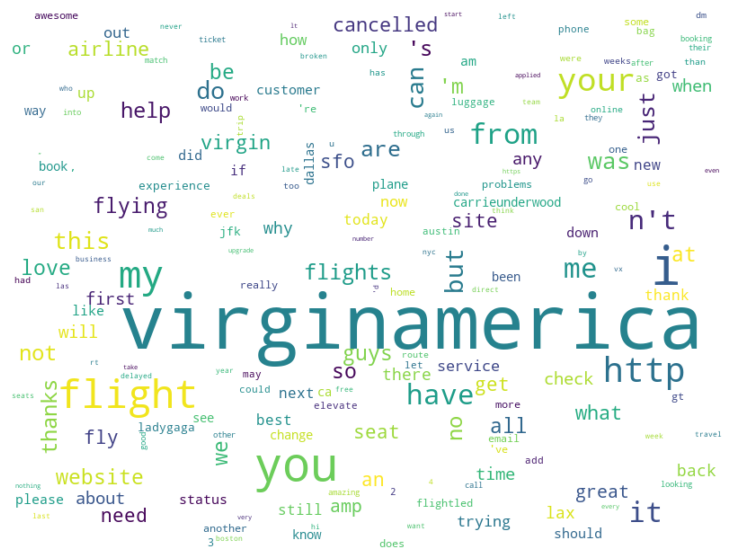

In [5]:
word_counts = Counter()
for text in filtered_data["text"]:
    processed_text = preprocess_text(text)
    word_counts.update(processed_text.split())

# Generate word cloud
cloudwords = WordCloud(background_color="white", width=800, height=600).generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 7))
plt.imshow(cloudwords, interpolation="bilinear")
plt.axis("off")

In [6]:
sentiment_counts = filtered_data["sentiment"].value_counts().reset_index(name="Count")

In [7]:
sentiment_counts

,sentiment,Count
0,0.000000,196
1,0.250000,23
2,0.500000,16
3,1.000000,15
4,0.200000,8
...,...,...
146,0.356250,1
147,0.012500,1
148,0.625521,1
149,-0.166667,1


In [8]:
sentiment_counts = filtered_data["sentiment"].value_counts().reset_index(name="Count")
sentiment_counts["sentiment_label"] = sentiment_counts["sentiment"].apply(lambda score: "Positive" if score > 0 else ("Negative" if score < 0 else "Neutral"))


In [9]:
sentiment_counts

,sentiment,Count,sentiment_label
0,0.000000,196,Neutral
1,0.250000,23,Positive
2,0.500000,16,Positive
3,1.000000,15,Positive
4,0.200000,8,Positive
...,...,...,...
146,0.356250,1,Positive
147,0.012500,1,Positive
148,0.625521,1,Positive
149,-0.166667,1,Negative
